In [1]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # Loads Mnist Dataset

# Scaling the Pixel values from 0 to 1
x_train = x_train/255.0  
x_test = x_test/255.0 

In [27]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

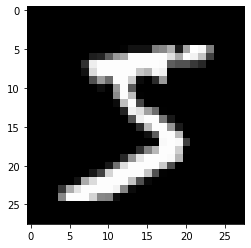

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray") # Showing the 1st image in Grayscale

In [4]:
# ENCODER 
encoder_input = keras.Input(shape=(28, 28, 1), name='img')   # It is a 28*28 image which means 784 features in Grayscale
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x) 
encoder = keras.Model(encoder_input, encoder_output)

In [5]:
# DECODER
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

In [6]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

In [7]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
autoencoder.compile(opt, loss='mse')

In [8]:
epochs=3
for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

1688/1688 [==============================] - 5s 2ms/step - loss: 0.0189 - val_loss: 0.0125
INFO:tensorflow:Assets written to: models/AE-1.model\assets
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0116 - val_loss: 0.0110
INFO:tensorflow:Assets written to: models/AE-2.model\assets
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0107 - val_loss: 0.0103
INFO:tensorflow:Assets written to: models/AE-3.model\assets


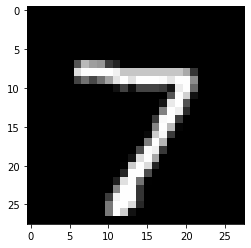

In [9]:
plt.imshow(x_test[0], cmap="gray")

In [10]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])

In [11]:
example[0].shape

(64,)

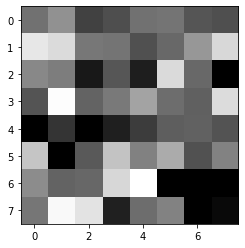

In [12]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")

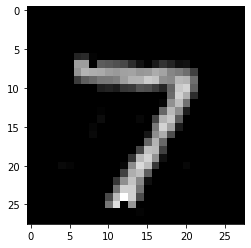

In [13]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0]  
plt.imshow(ae_out[0].reshape(28, 28), cmap="gray")

In [14]:
ae_out[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [15]:
import random


def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

In [16]:
noisy = add_noise(x_train[0])

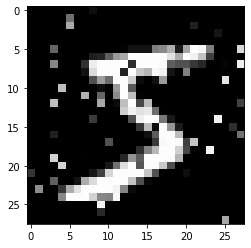

In [17]:
plt.imshow(noisy,cmap="gray")

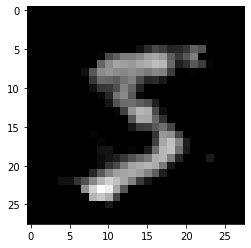

In [18]:
ae_out = autoencoder.predict([ noisy.reshape(-1, 28, 28, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0].reshape(28,28), cmap="gray")

In [19]:
def remove_values(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance: 
                new_val = 0  # changing this to be 0 
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

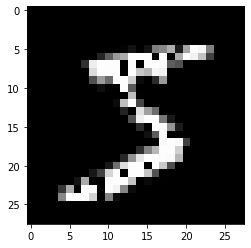

In [20]:
some_hidden = remove_values(x_train[0], random_chance=15)  # slightly higher chance so we see more impact
plt.imshow(some_hidden, cmap="gray")

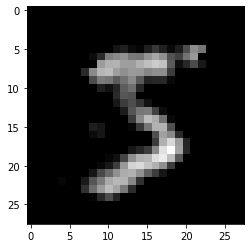

In [21]:
ae_out = autoencoder.predict([ some_hidden.reshape(-1, 28, 28, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0].reshape(28,28), cmap="gray")